# EUROPEAN SALES DATA / LINEAR REGRESSION MODEL
# Gülhan Damla Aşık - 2000136

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Read data
EuSalesDF = pd.read_csv("C:/Users/user/Desktop/BAU Lessons/2- Marketing Analysis/Hands On Exercises/Python/1- European Sales Dataset Python_lm/EuropeanSales.csv")

#Show first 10 rows of dataset
EuSalesDF.head(10)

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935
5,Finland,5.3,51.32,9.9,6.3,372,1971
6,France,61.9,44.51,10.0,5.7,96,5929
7,Germany,82.5,44.45,9.1,4.6,83,6824
8,Greece,11.2,31.67,9.9,3.9,73,813
9,Hungary,10.0,15.41,7.3,5.1,45,449


In [5]:
EuSalesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            21 non-null     object 
 1   Population         21 non-null     float64
 2   GDPperHead         21 non-null     float64
 3   UnemploymentRate   21 non-null     float64
 4   EducationSpending  21 non-null     float64
 5   SalesPerCapita     21 non-null     int64  
 6   ComputerSales      21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [6]:
EuSalesDF.describe()

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.723810,36.973810,8.100000,5.180952,115.333333,2492.809524
std,26.128929,18.654496,3.122979,1.269889,78.970459,2499.807965
min,4.400000,6.550000,3.600000,3.300000,20.000000,154.000000
25%,8.400000,20.670000,6.300000,4.400000,68.000000,813.000000
50%,10.700000,43.540000,7.300000,5.000000,101.000000,1682.000000
75%,44.800000,51.320000,9.900000,5.800000,151.000000,2879.000000
max,82.500000,64.430000,14.400000,8.400000,372.000000,9887.000000


In [7]:
# Null value checking
EuSalesDF.isna().sum()

Country              0
Population           0
GDPperHead           0
UnemploymentRate     0
EducationSpending    0
SalesPerCapita       0
ComputerSales        0
dtype: int64

# Exploratory Data Analysis (EDA)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


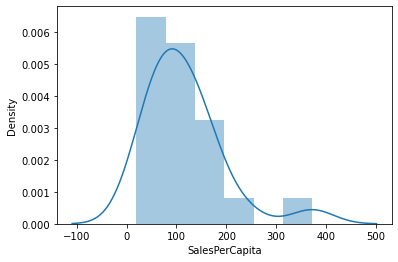

In [8]:
# SalesPerCapita is one of the target values
sns.distplot(EuSalesDF['SalesPerCapita'])
# distribution skewed

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


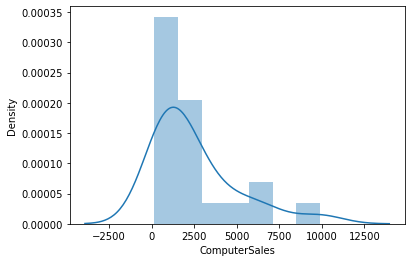

In [9]:
# ComputerSales is one of the target values
sns.distplot(EuSalesDF['ComputerSales'])
# distribution skewed

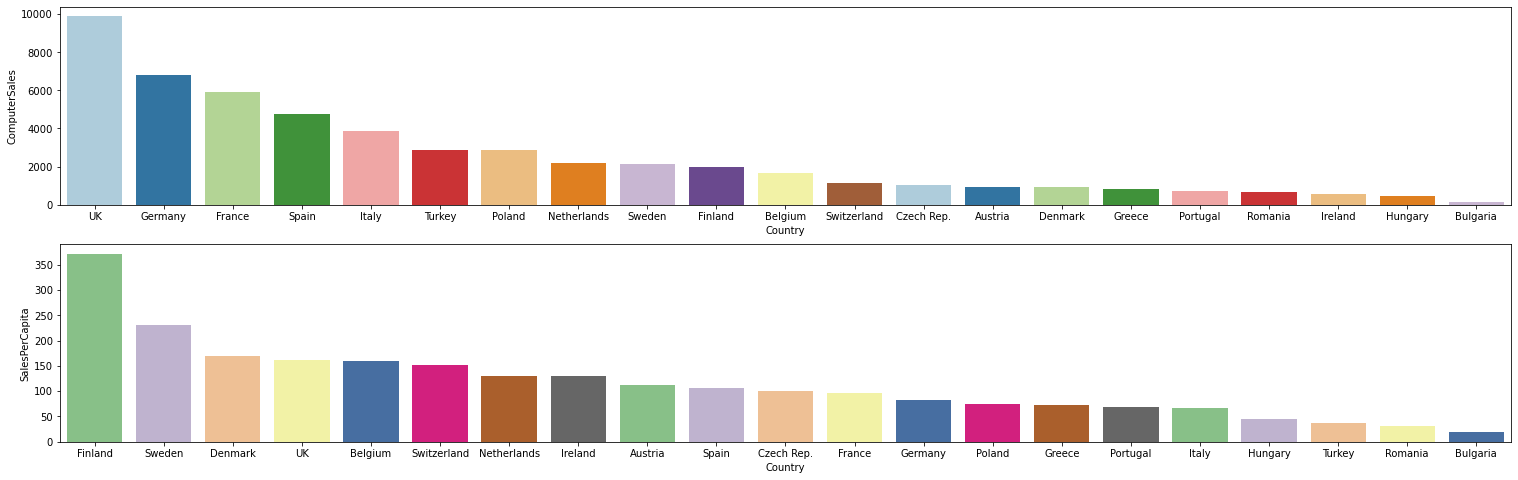

In [10]:
# Country columns is categorical and unique
fig, ax = plt.subplots(2,1,figsize=(26,8))

sns.barplot(x='Country', y='SalesPerCapita', data=EuSalesDF.sort_values('SalesPerCapita', ascending = False), palette='Accent', ax=ax[1])

sns.barplot(x='Country', y='ComputerSales', data=EuSalesDF.sort_values('ComputerSales', ascending = False), palette='Paired', ax=ax[0])

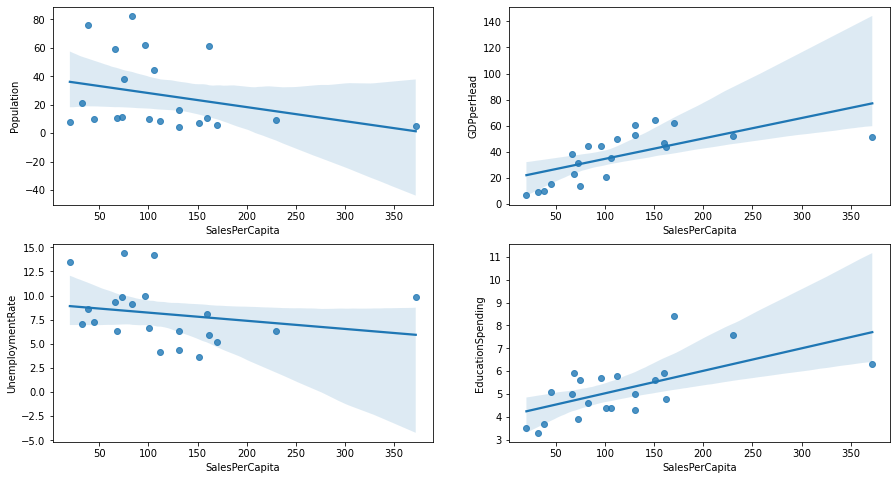

In [11]:
# Create visualization for SalesPerCapita
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.regplot(x="SalesPerCapita", y="Population", data=EuSalesDF , ax=ax[0,0]);
sns.regplot(x="SalesPerCapita", y="GDPperHead", data=EuSalesDF , ax=ax[0,1]);
sns.regplot(x="SalesPerCapita", y="UnemploymentRate", data=EuSalesDF , ax=ax[1,0]);
sns.regplot(x="SalesPerCapita", y="EducationSpending", data=EuSalesDF , ax=ax[1,1]);

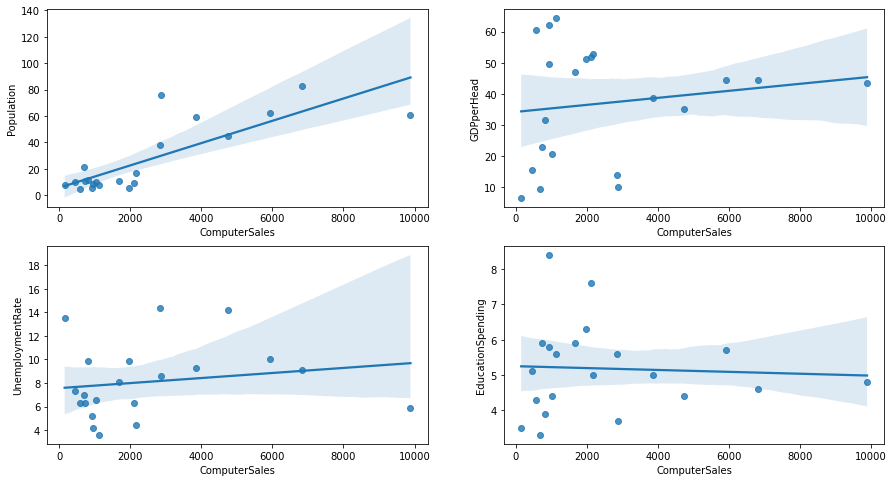

In [12]:
# Create visualization for ComputerSales
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.regplot(x="ComputerSales", y="Population", data=EuSalesDF , ax=ax[0,0]);
sns.regplot(x="ComputerSales", y="GDPperHead", data=EuSalesDF , ax=ax[0,1]);
sns.regplot(x="ComputerSales", y="UnemploymentRate", data=EuSalesDF , ax=ax[1,0]);
sns.regplot(x="ComputerSales", y="EducationSpending", data=EuSalesDF , ax=ax[1,1]);

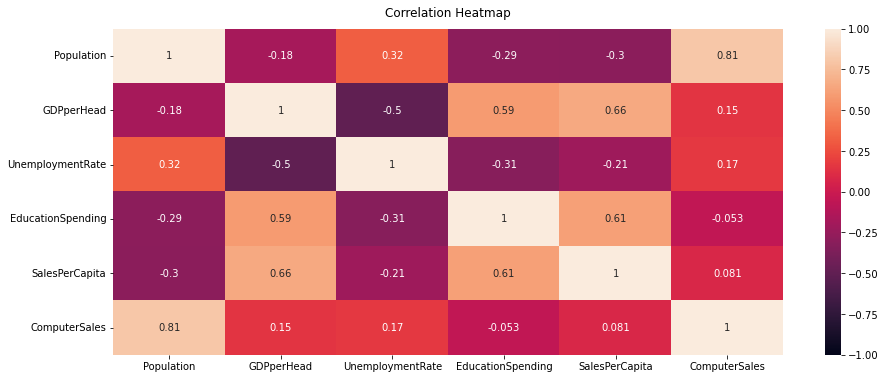

In [13]:
# Correlation check 
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(EuSalesDF.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Outlier Handling

In [14]:
#Number of columns and rows before outlier data handling
EuSalesDF.shape

(21, 7)

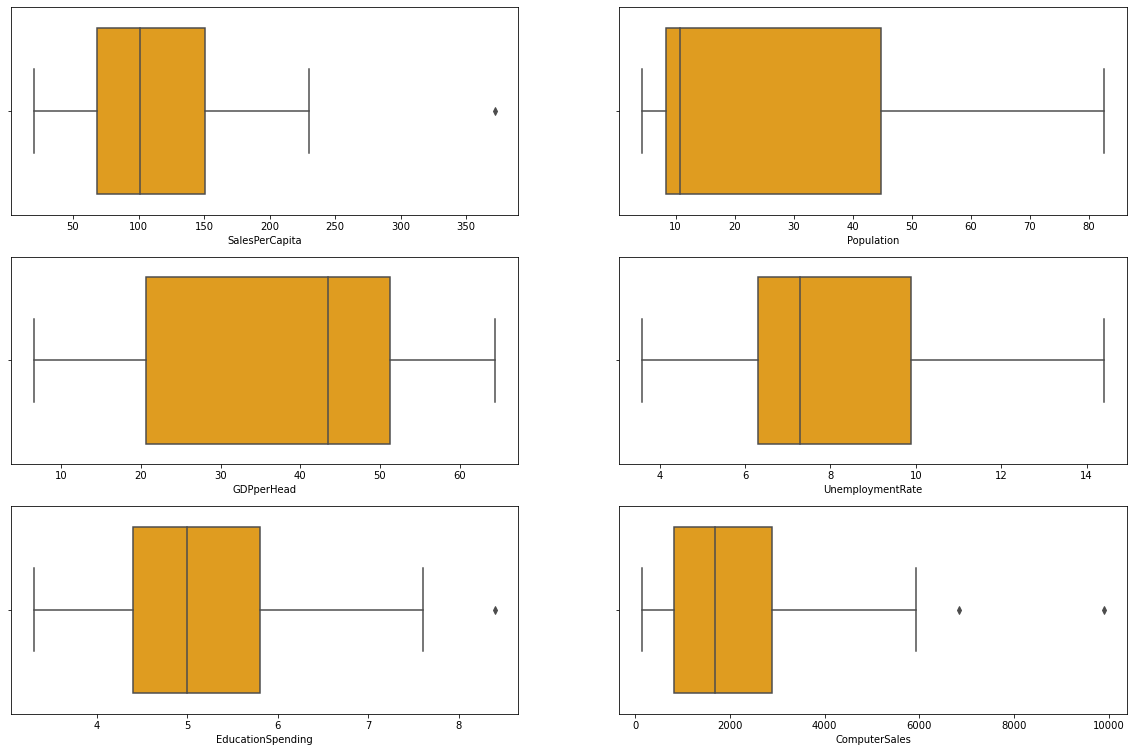

In [15]:
#Box plot before handle outlier data. 
fig, ax = plt.subplots(3,2,figsize=(20,13))

sns.boxplot(x=EuSalesDF["SalesPerCapita"], color='orange', ax=ax[0,0]);
sns.boxplot(x=EuSalesDF["Population"], color='orange', ax=ax[0,1]);
sns.boxplot(x=EuSalesDF["GDPperHead"], color='orange', ax=ax[1,0]);
sns.boxplot(x=EuSalesDF["UnemploymentRate"], color='orange', ax=ax[1,1]);
sns.boxplot(x=EuSalesDF["EducationSpending"], color='orange', ax=ax[2,0]);
sns.boxplot(x=EuSalesDF["ComputerSales"], color='orange', ax=ax[2,1]);

# SalesPerCapita has 1, EducationSpending has 1, ComputerSales has 2 outliers.

In [16]:
# Handling outliers
Q1 = EuSalesDF["SalesPerCapita"].quantile(0.25)
Q3 = EuSalesDF["SalesPerCapita"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
EuSalesDF = EuSalesDF[(EuSalesDF.SalesPerCapita > lower_limit) & (EuSalesDF.SalesPerCapita < (upper_limit))]

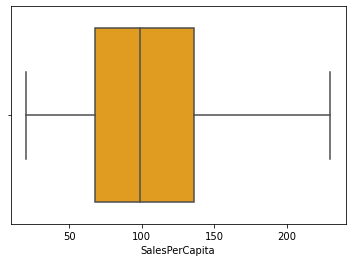

In [17]:
# after hangling
sns.boxplot(x=EuSalesDF["SalesPerCapita"], color='orange')

In [18]:
EuSalesDF.shape
# 1 row dropped

(20, 7)

In [19]:
Q1 = EuSalesDF["EducationSpending"].quantile(0.25)
Q3 = EuSalesDF["EducationSpending"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
EuSalesDF = EuSalesDF[(EuSalesDF.EducationSpending > lower_limit) & (EuSalesDF.EducationSpending < (upper_limit))]

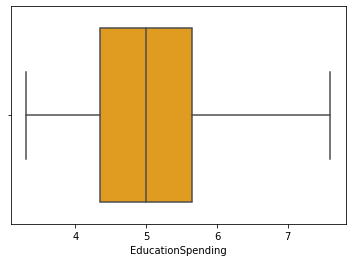

In [20]:
# after hangling
sns.boxplot(x=EuSalesDF["EducationSpending"], color='orange')

In [21]:
EuSalesDF.shape
# 1 row dropped

(19, 7)

In [22]:
Q1 = EuSalesDF["ComputerSales"].quantile(0.25)
Q3 = EuSalesDF["ComputerSales"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
EuSalesDF = EuSalesDF[(EuSalesDF.ComputerSales > lower_limit) & (EuSalesDF.ComputerSales < (upper_limit))]

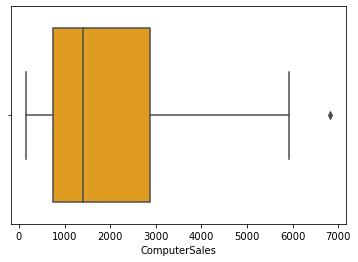

In [23]:
# after hangling
sns.boxplot(x=EuSalesDF["ComputerSales"], color='orange')

In [24]:
EuSalesDF.shape
# 2 rows dropped

(18, 7)

In [25]:
#Country is a categorical column and unique
EuSalesDF = EuSalesDF.drop(axis=1,columns="Country")

In [26]:
EuSalesDF.head()

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,8.4,49.60,4.2,5.8,112,941
1,10.5,47.09,8.1,5.9,160,1682
2,7.6,6.55,13.5,3.5,20,154
3,10.2,20.67,6.6,4.4,101,1029
6,61.9,44.51,10.0,5.7,96,5929


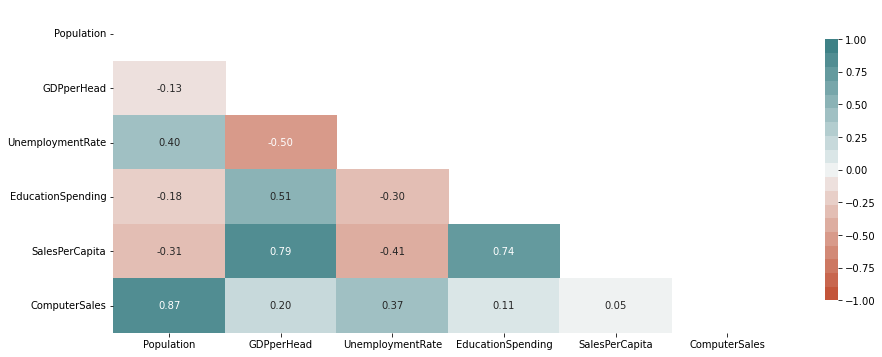

In [27]:
# Check the heatmap after outliers
EuSalesDF_heatmap = EuSalesDF.corr()
fig, ax = plt.subplots(figsize=(15, 6))
mask = np.triu(np.ones_like(EuSalesDF_heatmap, dtype=np.bool))
sns.heatmap(EuSalesDF_heatmap, mask = mask, annot = True, fmt = ".2f", cmap = sns.diverging_palette(1100, 200, n=19),
           vmin = -1, vmax = 1, cbar_kws = {"shrink": .8})

# Manipulation

In [28]:
#Log transformation
EuSalesDF = EuSalesDF.apply(np.log)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


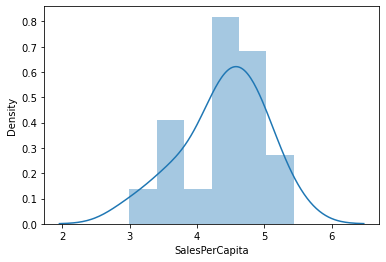

In [29]:
sns.distplot(EuSalesDF['SalesPerCapita'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


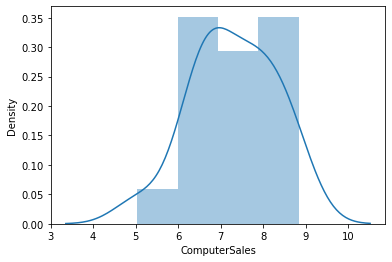

In [30]:
sns.distplot(EuSalesDF['ComputerSales'])

# Modelling SalesPerCapita

In [31]:
EuSalesDF2 = EuSalesDF.copy()

In [32]:
# remove target variable
X =  EuSalesDF2.drop(['SalesPerCapita'], axis=1)
y = EuSalesDF2["SalesPerCapita"]

In [33]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

In [34]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
print("X_train shape = {}\nX_test shape = {}".format(X_train_shape, X_test_shape))

X_train shape = (14, 5)
X_test shape = (4, 5)


In [43]:
y_train.shape

(14,)

In [44]:
y_test.shape

(4,)

In [35]:
lm_spc = LinearRegression()
model_spc = lm_spc.fit(X_train, y_train)

In [36]:
Y_pred_train = model_spc.predict(X_train)
Y_pred_test = model_spc.predict(X_test)

In [37]:
r2_test = r2_score(y_test,Y_pred_test)
r2_train = r2_score(y_train,Y_pred_train)

In [38]:
adjusted_r_squared_test = 1 - (1-r2_test)*(EuSalesDF2.shape[0]-1)/(EuSalesDF2.shape[0]-X.shape[1]-1)
adjusted_r_squared_train = 1 - (1-r2_train)*(EuSalesDF2.shape[0]-1)/(EuSalesDF2.shape[0]-X.shape[1]-1)

In [39]:
mse_test = mean_squared_error(y_test,Y_pred_test)
mse_train = mean_squared_error(y_train,Y_pred_train)

In [40]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

In [42]:
print("Model Evaluation for SalesPerCapita")
print("Test results \nR-squared is ", r2_test)
print("Adjusted R-squared is ", adjusted_r_squared_test)
print("MSE is ", mse_test)
print("RSE is ", rmse_test)

print("\nTrain results \nR-squared is ", r2_train)
print("Adjusted R-squared is ", adjusted_r_squared_train)
print("MSE is ", mse_train)
print("RSE is ", rmse_train)

Model Evaluation for SalesPerCapita
Test results 
R-squared is  0.9995272653049018
Adjusted R-squared is  0.9993302925152775
MSE is  4.076139027679996e-05
RSE is  0.006384464760400824

Train results 
R-squared is  0.9999827779424981
Adjusted R-squared is  0.9999756020852056
MSE is  6.639409338073793e-06
RSE is  0.002576705132154976


# Modelling ComputerSales

In [124]:
EuSalesDF3 = EuSalesDF.copy()

In [125]:
# remove target variable
X =  EuSalesDF3.drop(['ComputerSales'], axis=1)
y = EuSalesDF3["ComputerSales"]

In [126]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

In [127]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
print("X_train shape = {}\nX_test shape = {}".format(X_train_shape, X_test_shape))

X_train shape = (13, 5)
X_test shape = (4, 5)


In [129]:
lm_spc = LinearRegression()
model_spc = lm_spc.fit(X_train, y_train)

In [130]:
Y_pred_train = model_spc.predict(X_train)
Y_pred_test = model_spc.predict(X_test)

In [131]:
r2_test = r2_score(y_test,Y_pred_test)
r2_train = r2_score(y_train,Y_pred_train)

In [132]:
adjusted_r_squared_test = 1 - (1-r2_test)*(EuSalesDF3.shape[0]-1)/(EuSalesDF3.shape[0]-X.shape[1]-1)
adjusted_r_squared_train = 1 - (1-r2_train)*(EuSalesDF3.shape[0]-1)/(EuSalesDF3.shape[0]-X.shape[1]-1)

In [133]:
mse_test = mean_squared_error(y_test,Y_pred_test)
mse_train = mean_squared_error(y_train,Y_pred_train)

In [134]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

In [135]:
print("Model Evaluation for ComputerSales")
print("Test results \nR-squared is ", r2_test)
print("Adjusted R-squared is ", adjusted_r_squared_test)
print("RSE is ", rmse_test)

print("\nTrain results \nR-squared is ", r2_train)
print("Adjusted R-squared is ", adjusted_r_squared_train)
print("RSE is ", rmse_train)

Model Evaluation for ComputerSales
Test results 
R-squared is  0.9999344316613233
Adjusted R-squared is  0.9999046278710157
RSE is  0.006381278210181943

Train results 
R-squared is  0.9999926623426201
Adjusted R-squared is  0.999989327043811
RSE is  0.002580458815696263
